In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 8.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=2896fc7da4dd44810cc74db32fa49e8e559c9d258245621683a628f08fea6b3b
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sujithbonthala","key":"ddaf4f49b1ddcbb4f5b359ec25a22c4d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d lsind18/gemstones-images

In [ ]:
! unzip gemstones-images.zip -d dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!mkdir -p dataset_small

In [ ]:
training_path = "/content/dataset_small/train"
test_path = "/content/dataset_small/test"

In [ ]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 326 images belonging to 11 classes.


In [ ]:
test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 41 images belonging to 11 classes.


In [ ]:
CNNmodel_aug = tf.keras.models.Sequential()

# Feature extraction part
CNNmodel_aug.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3)))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(256,(3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(512,(3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(512,(3,3), activation='relu'))
# Neural network - For classification
CNNmodel_aug.add(tf.keras.layers.Flatten())
CNNmodel_aug.add(tf.keras.layers.Dense(256, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(512, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(11, activation='softmax'))

#Compile
CNNmodel_aug.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = CNNmodel_aug.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 30)

Epoch 1/30
11/11 [==============================] - 6s 443ms/step - loss: 2.3925 - accuracy: 0.0841 - val_loss: 2.1290 - val_accuracy: 0.1220
Epoch 2/30
11/11 [==============================] - 4s 336ms/step - loss: 2.1194 - accuracy: 0.1867 - val_loss: 1.8056 - val_accuracy: 0.2683
Epoch 3/30
11/11 [==============================] - 4s 342ms/step - loss: 1.6171 - accuracy: 0.3793 - val_loss: 1.4331 - val_accuracy: 0.3902
Epoch 4/30
11/11 [==============================] - 4s 336ms/step - loss: 1.1542 - accuracy: 0.4629 - val_loss: 0.7225 - val_accuracy: 0.6829
Epoch 5/30
11/11 [==============================] - 4s 367ms/step - loss: 0.9038 - accuracy: 0.6106 - val_loss: 1.1968 - val_accuracy: 0.3902
Epoch 6/30
11/11 [==============================] - 4s 337ms/step - loss: 1.1229 - accuracy: 0.5645 - val_loss: 0.6408 - val_accuracy: 0.8049
Epoch 7/30
11/11 [==============================] - 4s 367ms/step - loss: 0.7279 - accuracy: 0.7191 - val_loss: 0.6310 - val_accuracy: 0.7317
Epoch 

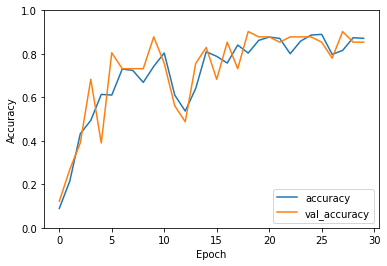

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

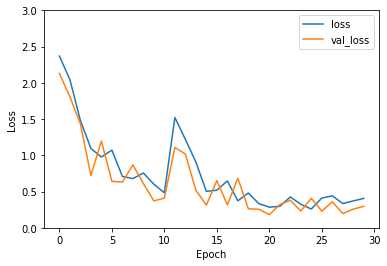

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,3])
plt.legend(loc='upper right')

In [ ]:
!mkdir -p saved_model
CNNmodel_aug.save('drive/MyDrive/saved_model/my_model')

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/my_model/assets
